In [1]:
import skimage.io
from skimage.filters import threshold_otsu
import glob
import numpy as np

import matplotlib.pyplot as plt

In [2]:
PATH = "nikon_BF_ROI/"

# Load BF tifs only
BF_IMAGES = sorted(glob.glob('%s*[!ROI].tif' % PATH))

### Experimental Info
Saving brightfield images for well B1 only.

ONL : Outer nuclear layer  
BP  : Bipolar layer  
RGC : Retinal ganglion cells  

In [3]:
#Normalize the display range of the images. 
#Sets the min and max to be a percentile of foreground or background pixels
def normalizeRange(arr, **kwargs):
    thresh = threshold_otsu(arr)
    pxforeground = arr[arr>thresh]
    
    maxperc = kwargs.get("max")
    minperc = kwargs.get("min")
    
    maxpx = np.percentile(pxforeground, maxperc)
    minpx = np.percentile(arr, minperc)
    
    if kwargs.get("minmaxpx"):
        imgnorm = (arr-minpx) / (maxpx - minpx)
    else:
        imgnorm = arr / maxpx
        
    imgnorm[imgnorm>=1]=1
    
    return imgnorm

In [4]:
# Load images
bf_img = [skimage.io.imread(img) for img in BF_IMAGES]

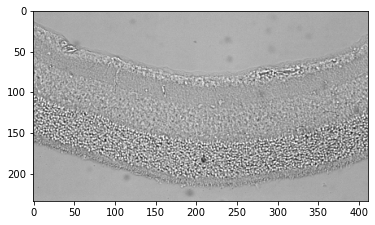

In [5]:
#Adjust contrast for first img and look at the first img
bf_norm = normalizeRange(bf_img[0], min=0, max=99, minmaxpx=True)
bf_norm = skimage.color.gray2rgb(bf_norm)
plt.imshow(bf_norm)

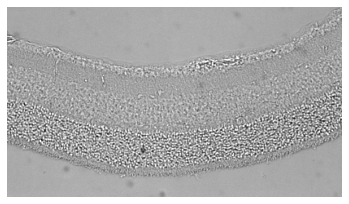

In [6]:
# Perform on all imgs and save
for idx,img in enumerate(bf_img):
    bf_norm = normalizeRange(img, min=0, max=99, minmaxpx=True)
    bf_norm = skimage.color.gray2rgb(bf_norm)
    
    
    plt.imshow(bf_norm)
    plt.axis("off")
    plt.savefig('%s.png' % BF_IMAGES[idx].split(".tif")[0], dpi=1000, bbox_inches='tight', transparent='True', pad_inches=0)

In [7]:
#Note distance calibrations
#Original image is 412x234 with a 10x objective and 1.6 microns / pixel